# Análisis exploratorio de los datos
1. ¿Hay correlación entre el tiempo delta y el conteo de vistas?
    a. Esto para saber si entre más antigua la noticia, había tenido más
    visualizaciones.
2. ¿Cuáles son los tipos de datos de las columnas?
3. ¿Qué tipos de distribución de las columnas?
4. ¿Existen datos nulos o None?
5. ¿Existen datos duplicados?

## Información a presentar
* Ranking de noticias más populares
* Usaremos Matplotlib por simplicidad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/interim/clean_data_01.csv')

In [3]:
df['created_date'] = pd.to_datetime(df['created_date'], format='%Y-%m-%d')
df['current_date'] = pd.to_datetime(df['current_date'], format='%Y-%m-%d')

# https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html#pandas-to-timedelta
df['delta_date'] = pd.to_timedelta(df['delta_date'])

In [4]:
# df['category'] = df['category'].astype(str)

In [5]:
df.head()

,url,title,category,created_date,current_date,view_count,delta_date
0,https://www.biobiochile.cl/noticias/futbol-int...,La dura niñez de Shevchenko entre Chernobyl y ...,notas-futbol-internacional,2021-05-03,2023-10-19,7076,899 days
1,https://www.biobiochile.cl/noticias/nacional/r...,Alcalde de Tucapel solicita acelerar obras de ...,region-del-bio-bio,2021-05-03,2023-10-19,898,899 days
2,https://www.biobiochile.cl/noticias/internacio...,Agencia Europea de Medicamento evalúa el uso d...,europa,2021-05-03,2023-10-19,488,899 days
3,https://www.biobiochile.cl/noticias/nacional/r...,"TENS prestó $8,5 millones a su amor virtual pa...",region-metropolitana,2021-05-03,2023-10-19,23851,899 days
4,https://www.biobiochile.cl/noticias/nacional/r...,Dos incendios movilizaron a Bomberos en Los Án...,region-del-bio-bio,2021-05-03,2023-10-19,718,899 days


In [6]:
df.shape

(909888, 7)

In [7]:
print(df.info())
print('-'*20)
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909888 entries, 0 to 909887
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   url           909888 non-null  object         
 1   title         909888 non-null  object         
 2   category      909888 non-null  object         
 3   created_date  909888 non-null  datetime64[ns] 
 4   current_date  909888 non-null  datetime64[ns] 
 5   view_count    909888 non-null  int64          
 6   delta_date    909888 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 48.6+ MB
None
--------------------
object             3
datetime64[ns]     2
int64              1
timedelta64[ns]    1
Name: count, dtype: int64


In [8]:
# mostramos datos estadísticos de las variables numéricas
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created_date,909888,2016-03-21 23:36:41.951888384,2009-05-27 00:00:00,2012-11-04 00:00:00,2016-02-07 00:00:00,2019-04-29 00:00:00,2023-06-30 00:00:00,NaN
current_date,909888,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,NaN
view_count,909888.0,8432.529217,47.0,458.0,1233.0,5249.0,2481797.0,26251.849472
delta_date,909888,2767 days 00:23:18.048111392,111 days 00:00:00,1634 days 00:00:00,2811 days 00:00:00,4001 days 00:00:00,5258 days 00:00:00,1398 days 18:39:03.033797536


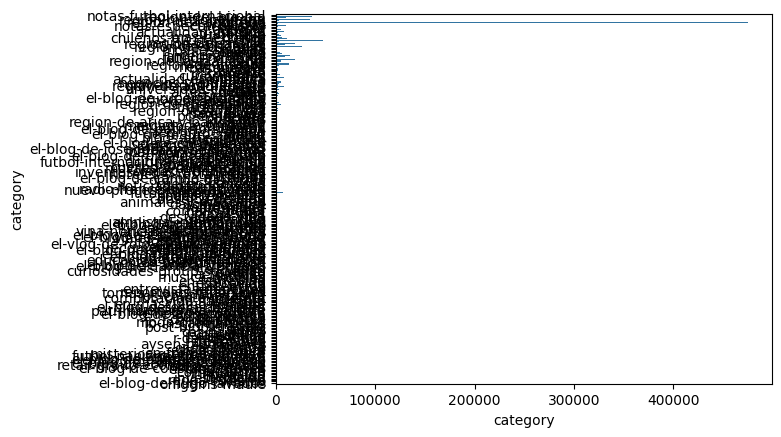

In [7]:
sns.countplot(df['category'])
plt.xlabel('category')
plt.show()

df['delta_date'] = df['delta_date'].astype(int)

¿Codificar la variable `category` con LabelEncoder o OneHotEncoder? (sklearn.preprocessing)

La desventaja de LabelEncoder es que se le puede asignar prioridad a numeros mayores

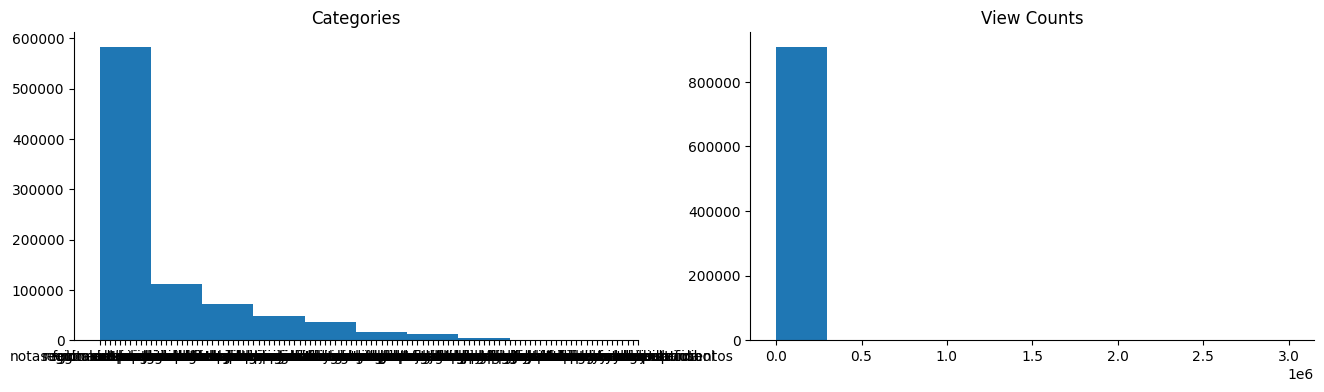

In [9]:

%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1, ax2 = fig.axes
ax1.hist(df['category'], range = (0,100)) # bin range = 1
ax1.set_title('Categories')

ax2.hist(df['view_count'], range = (40,3000000)) # bin range = 10
ax2.set_title('View Counts')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

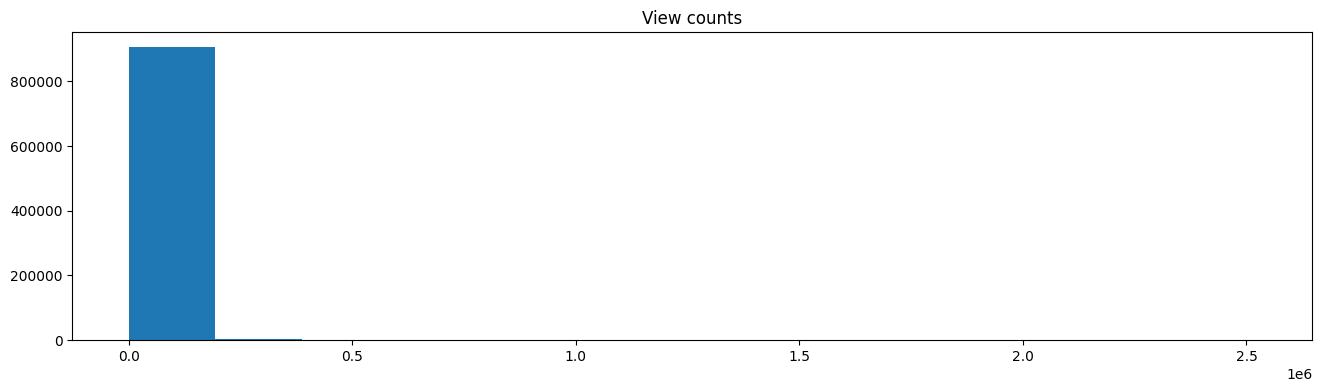

In [34]:
%matplotlib inline
'''
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,4))
ax1, ax2 = fig.axes
ax1.hist(df['category'], range = (0,100)) # bin range = 1
ax1.set_title('Categories')

ax2.hist(df['view_count'], bins = 10, range = (40,3000000)) # bin range = 10
ax2.set_title('View Counts')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()
'''
##########
num_bins = 20

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
binwidth = 8432*23
# the histogram of the data
ax.hist(df['view_count'], bins=range(47, 2481797 + binwidth, binwidth))
#ax.hist(df['view_count'], bins=2)

# add a 'best fit' line
ax.set_title('View counts')

plt.show()

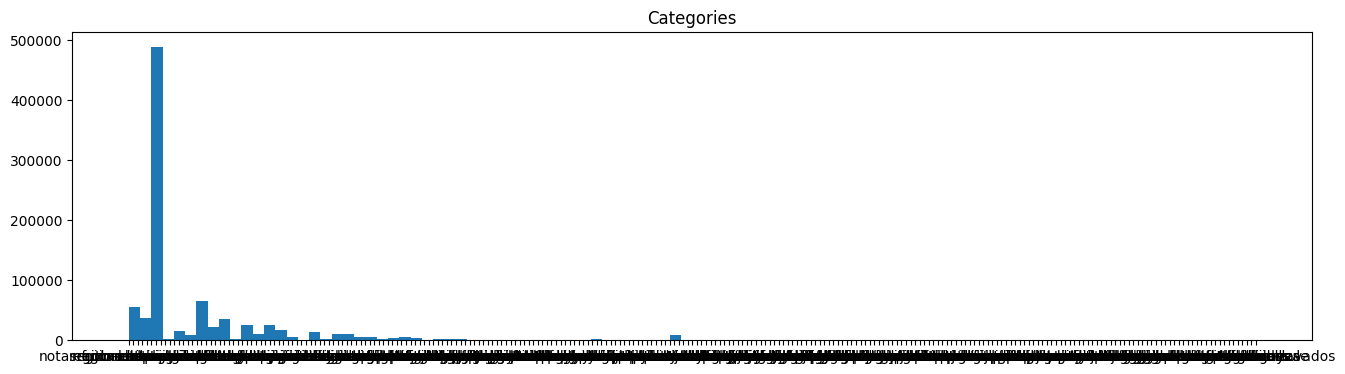

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,4))
binwidth = 8432
# the histogram of the data
#ax.hist(df['category'], bins=range(47, 2481797 + binwidth, binwidth))
ax.hist(df['category'], bins=100)

# add a 'best fit' line
ax.set_title('Categories')

plt.show()

In [35]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created_date,909888,2016-03-21 23:36:41.951888384,2009-05-27 00:00:00,2012-11-04 00:00:00,2016-02-07 00:00:00,2019-04-29 00:00:00,2023-06-30 00:00:00,NaN
current_date,909888,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,NaN
view_count,909888.0,8432.529217,47.0,458.0,1233.0,5249.0,2481797.0,26251.849472
delta_date,909888,2767 days 00:23:18.048111392,111 days 00:00:00,1634 days 00:00:00,2811 days 00:00:00,4001 days 00:00:00,5258 days 00:00:00,1398 days 18:39:03.033797536
